<a href="https://colab.research.google.com/github/Redwoods/dle/blob/main/notebook/ch14_generative_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch14
- auto encoder
- gan

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000, 784)
Epoch 1/50
235/235 [==============================] - 11s 10ms/step - loss: 0.0702 - val_loss: 0.0410
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0350 - val_loss: 0.0292
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0262 - val_loss: 0.0230
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0214 - val_loss: 0.0193
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0183 - val_loss: 0.0167
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0161 - val_loss: 0.0149
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0145 - val_loss: 0.0135
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0133 - val_loss: 0.0125
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0124 - val_loss: 0.0117
Epoc

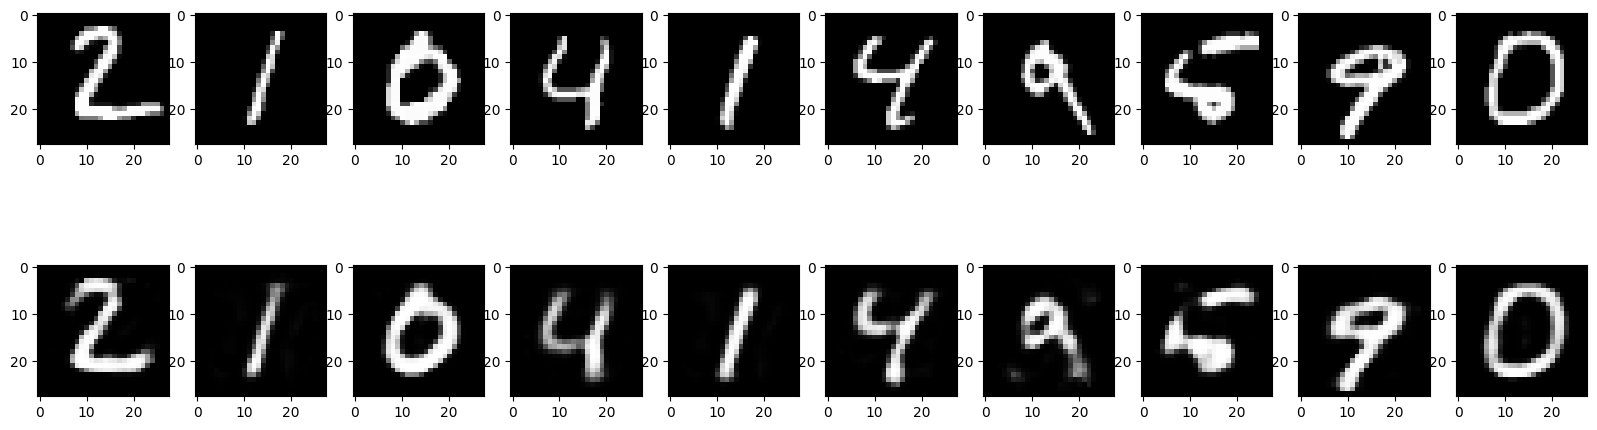

In [1]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

encoding_dim = 32  
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


decoded_imgs = autoencoder.predict(x_test)
print(decoded_imgs.shape)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
plt.show()

### Denoising by auto encoder

(60000, 784)
Epoch 1/50
235/235 [==============================] - 5s 12ms/step - loss: 0.0738 - val_loss: 0.0472
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0411 - val_loss: 0.0360
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0335 - val_loss: 0.0307
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0294 - val_loss: 0.0276
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0269 - val_loss: 0.0256
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0253 - val_loss: 0.0243
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0241 - val_loss: 0.0233
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0231 - val_loss: 0.0226
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0225 - val_loss: 0.0220
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0221 - va

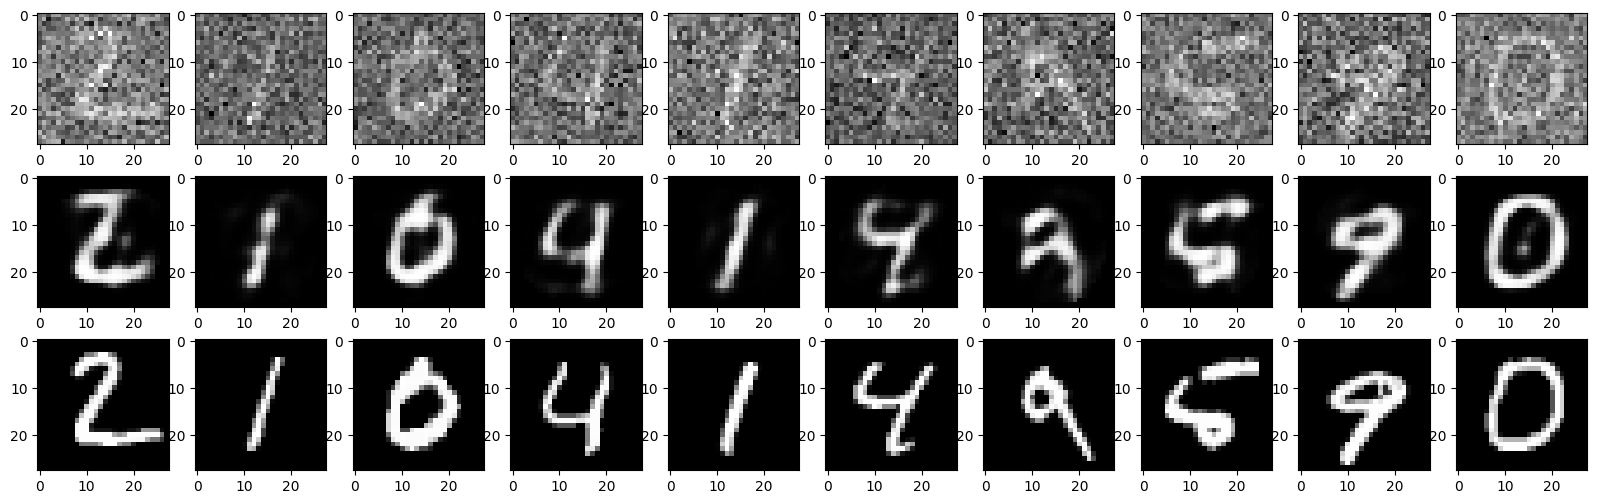

In [2]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

encoding_dim = 32  
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)  # (784,784)

mnist = tf.keras.datasets.mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Flattening: (28,28)=> (784,)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.55

original_train = x_train
original_test = x_test
noise_train = np.random.normal(0, 1, original_train.shape)
noise_test = np.random.normal(0, 1, original_test.shape)
noisy_train = original_train + noise_factor * noise_train
noisy_test = original_test + noise_factor * noise_test
print(noisy_train.shape)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(noisy_train, original_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(noisy_test, original_test))

denoised_images = autoencoder.predict(noisy_test)
print(denoised_images.shape)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(noisy_test[i].reshape(28, 28), cmap='gray')
    plt.gray()

    ax = plt.subplot(3, n, i + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    plt.gray()

    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(original_test[i].reshape(28, 28), cmap='gray')
    plt.gray()
    
plt.show()

### generative image
- VAE (variational auto encoder)